# Noise2Void - 3D Example for Flywing Data

In [2]:
# We import all our dependencies.
from n2v.models import N2V
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread
from csbdeep.io import save_tiff_imagej_compatible

## Load the Network

In [2]:
# A previously trained model is loaded by creating a new N2V-object without providing a 'config'.
model_name = 'Noise2Void - Stitched Panel'
basedir = 'models'
model = N2V(config=None, name=model_name, basedir=basedir)

Loading network weights from 'weights_best.h5'.


In [3]:
# In case you do not want to load the weights that lead to lowest validation loss during 
# training but the latest computed weights, you can execute the following line:

# model.load_weights('weights_last.h5')

## Prediction
Here we will simply use the same data as during training and denoise it using our network.

In [4]:
# We load the data we want to process.
import pims
import numpy as np
import dask
import dask.array
import warnings
import cupy as cp
import glob
__author__ = """João Mamede"""
__email__ = "jmamede@rush.edu"
import sys 
sys.path.insert(0,'/home/jmamede/scripts/LivePanelize')
import Libraries

filelist = glob.glob('/home/jmamede/Data/CaRuby3/20201231/jan2020igfp3caru3_f2_vitc_pbn_nh4cl45mins_pump_004_*.tiff')
filelist.sort()

# all = []
filelist
all = Libraries.stitch(filelist,6,6)
all8 = all.map_blocks(Libraries.convert16to8bits)
#can't reshape I don't know why, resclicing was the only way I found
green = all8[:-3:3]
# red = all8[1:-2:3]
# blue = all8[2:-1:3]

# green.shape
# green = green.reshape(1,119,5120,5120,1)
# green = [dask.array.moveaxis(green, 0, -1)]

# Here we process the data.
# The 'n_tiles' parameter can be used if images are too big for the GPU memory.
# If we do not provide the 'n_tiles' parameter the system will automatically try to find an appropriate tiling.
pred = model.predict(green[0], axes='TZYXC',
                     #n_tiles=(2,4,4)
                    )

100%|██████████| 16/16 [00:02<00:00,  6.41it/s]  


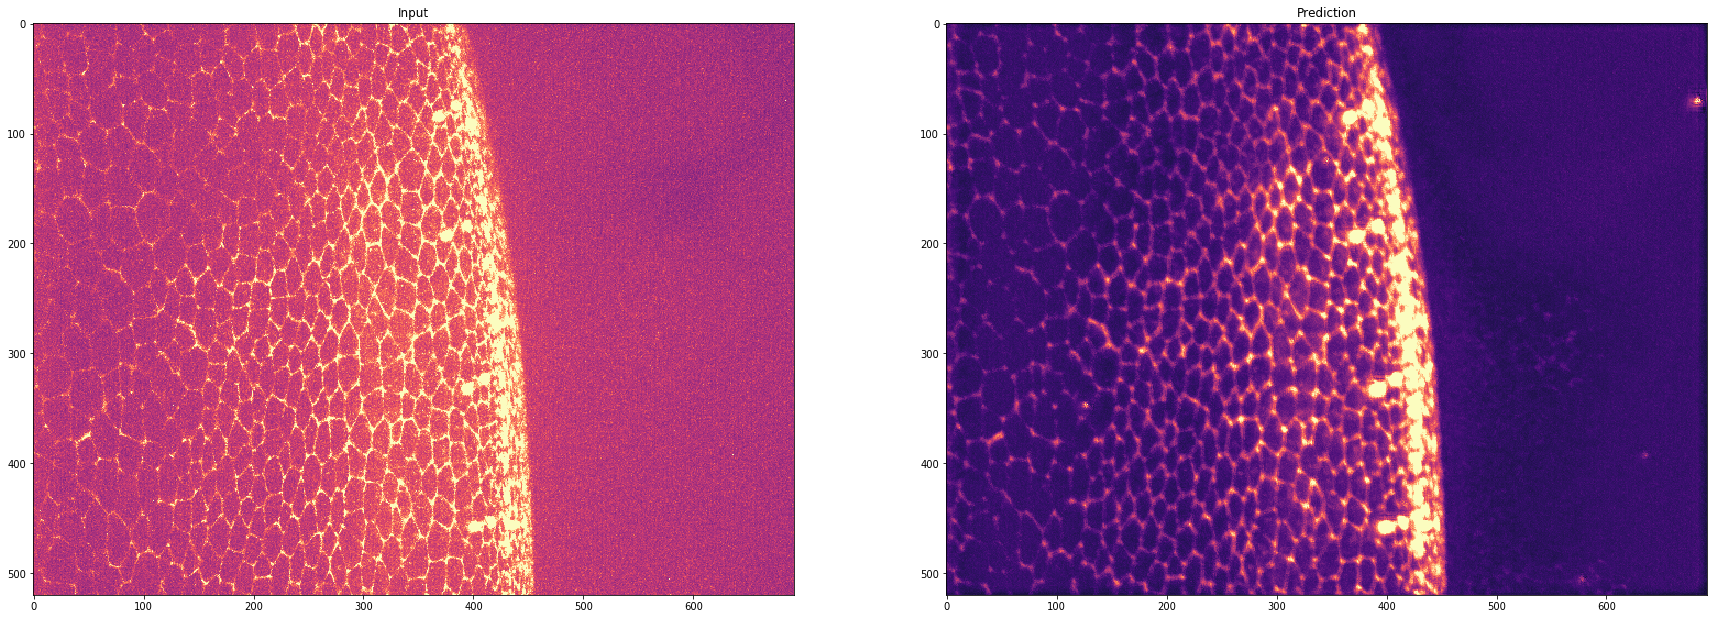

In [5]:
# Let's look at the results.
plt.figure(figsize=(30,30))

# We show the noisy input...
plt.subplot(1,2,1)
plt.imshow(green[0,:,:].compute(), 
           cmap='magma',
           vmin=np.percentile(green[0,:,:].compute(),0.1),
           vmax=np.percentile(greeb[0,:,:].compute(),99.9)
          )
plt.title('Input');

# and the result.
plt.subplot(1,2,2)
plt.imshow(pred), 
           cmap='magma',
           vmin=np.percentile(pred,0.1),
           vmax=np.percentile(pred,99.9)
          )
plt.title('Prediction');

## Save results

In [6]:
save_tiff_imagej_compatible('prediction.tif', pred, 'ZYX')